In [1]:
#Calling all the required libraries required for EDA analysis
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [2]:
#Creating df1 dataframe from 'df1.csv' file containing data from 1st December till 10th of December
df = pd.read_csv('final_train_test_data.csv')

In [19]:
df['DayName'] = pd.to_datetime(df['TimestampRequest']).dt.day_name()

In [20]:
#Transforming HTTP Auth column values into binary values 0 for User_Key wheras 1 for API_Key====(By Abhishek)
df['Transformed_HTTP_Auth'] = np.where(df['HTTPAuth'].str.contains('USER_KEY'), 0, 1)
#=================================================================================================

In [ ]:
df['Resource'].value_counts()

In [22]:
#=====Filtering final_df dataframe containing data of top 10 organization====================(By Abhishek)
df = df[df['Organization'].isin(org)]
#====================================================================================================

In [23]:
#Creating dummy variables for 'HTTP Method','time_period','Resource' variables==============(By Abhishek)
df_encoded = pd.get_dummies(df, columns=['HTTPMethod','TimePeriod','Resource','DayName'])
#====================================================================================================

In [24]:
df.head()

,Unnamed: 0,SourceIP,HTTPMethod,HTTPUrl,HTTPAuth,Resource,Organization,TimestampRequest,Response_Time,LoadFactor,...,TimePeriod,City,Country,Continent,Latitude,Longitude,Minutes,Day,DayName,Transformed_HTTP_Auth
0,9978896,62.48.164.172,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 2b93,DocumentResource.get,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-12-18 07:18:47.683633,0 days 00:00:00.087810,0,...,Morning,Figueira da Foz Municipality,Portugal,Europe,40.1482,-8.85482,18,18,Sunday,1
2,16720018,62.48.164.172,GET,https://api.docdigitizer.com/api/v1/tasks/de08...,API_KEY 2b93,TaskResource.get,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-12-30 06:39:28.968201,0 days 00:00:00.102287,0,...,Morning,Figueira da Foz Municipality,Portugal,Europe,40.1482,-8.85482,39,30,Friday,1
3,2368948,3.224.122.159,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 9ffb,DocumentResource.get,f00716b5-e120-4699-b827-791d6e2a2565,2022-12-04 09:33:32.491024,0 days 00:00:00.086234,0,...,Late Morning,Ashburn,United States,North America,39.0438,-77.48740,33,4,Sunday,1
4,9253192,62.48.164.172,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 2b93,DocumentResource.get,6b1faf26-cb89-4cc0-a158-d494e1c664cd,2022-12-17 00:31:50.969000,0 days 00:00:00.093735,0,...,Late Night,Figueira da Foz Municipality,Portugal,Europe,40.1482,-8.85482,31,17,Saturday,1
5,11313007,194.79.66.193,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 5b2c,DocumentResource.get,9360f6cc-a025-47db-bbf2-b4046f27f8a6,2022-12-20 13:11:44.073419,0 days 00:00:00.107399,0,...,Afternoon,Carnaxide,Portugal,Europe,38.7259,-9.23161,11,20,Tuesday,1


In [25]:
df_encoded.columns

Index(['Unnamed: 0', 'SourceIP', 'HTTPUrl', 'HTTPAuth', 'Organization',
       'TimestampRequest', 'Response_Time', 'LoadFactor', 'Hour', 'City',
       'Country', 'Continent', 'Latitude', 'Longitude', 'Minutes', 'Day',
       'Transformed_HTTP_Auth', 'HTTPMethod_GET', 'HTTPMethod_HEAD',
       'HTTPMethod_PATCH', 'HTTPMethod_POST', 'TimePeriod_Afternoon',
       'TimePeriod_Early Morning', 'TimePeriod_Evening',
       'TimePeriod_Late Afternoon', 'TimePeriod_Late Morning',
       'TimePeriod_Late Night', 'TimePeriod_Morning', 'TimePeriod_Night',
       'Resource_DocumentAnnotationListResource.get',
       'Resource_DocumentAnnotationResource.post',
       'Resource_DocumentAssetsListResource.get',
       'Resource_DocumentClassesListResource.get',
       'Resource_DocumentExportTemplateResource.get',
       'Resource_DocumentListAnnotationResource.post',
       'Resource_DocumentListResource.get',
       'Resource_DocumentRejectionResource.get',
       'Resource_DocumentRejectionsList

In [26]:
#===============Removing columns to implement Decsion Tree from df_encoded dataframe========================
columns = ['Unnamed: 0', 'SourceIP', 'HTTPUrl', 'HTTPAuth', 'Organization',
       'TimestampRequest', 'Response_Time','Hour', 'City',
       'Country', 'Continent', 'Latitude', 'Longitude', 'Day','Resource_DocumentAssetsListResource.get','Resource_DocumentAnnotationListResource.get',
          'Resource_DocumentExportTemplateResource.get','Resource_DocumentRejectionResource.get','Resource_IntegrationSettingsResource.get']
df_encoded = df_encoded.drop(columns, axis = 1)

In [27]:
df_encoded.head()

,LoadFactor,Transformed_HTTP_Auth,HTTPMethod_GET,HTTPMethod_HEAD,HTTPMethod_PATCH,HTTPMethod_POST,TimePeriod_Afternoon,TimePeriod_Early Morning,TimePeriod_Evening,TimePeriod_Late Afternoon,...,Resource_DocumentSlaResource.post,Resource_OrganizationResource.get,Resource_TaskResource.get,DayName_Friday,DayName_Monday,DayName_Saturday,DayName_Sunday,DayName_Thursday,DayName_Tuesday,DayName_Wednesday
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
###==========================Decision Tree===================================(By Abhishek)
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# Splitting the data into features (X) and target (y)
X = df_encoded.drop('LoadFactor', axis=1)
y = df_encoded['LoadFactor']

# Perform stratified sampling using train_test_split from scikit-learn
# Specify the test_size and random_state parameters as per your requirements
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = DecisionTreeClassifier()

# Fitting the classifier to the training data
clf.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9348383947404956


In [34]:
#=========Classification Report based on Decision Tree===========================(By Abhishek)
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)
#===================================================================================================

              precision    recall  f1-score   support

           0       0.94      0.99      0.96    605423
           1       0.81      0.42      0.55     64450

    accuracy                           0.93    669873
   macro avg       0.88      0.71      0.76    669873
weighted avg       0.93      0.93      0.93    669873



In [35]:
#========================================Decision Tree==========================================================================
importances = clf.feature_importances_

# Create a dataframe with feature names and importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the dataframe by importance values in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

                                         Feature    Importance
0                          Transformed_HTTP_Auth  6.608748e-01
15  Resource_DocumentListAnnotationResource.post  1.719097e-01
18                 Resource_DocumentResource.get  3.684862e-02
28                              DayName_Thursday  1.786163e-02
1                                 HTTPMethod_GET  1.471264e-02
17  Resource_DocumentRejectionsListResource.post  1.013821e-02
14      Resource_DocumentClassesListResource.get  8.910551e-03
30                             DayName_Wednesday  7.948267e-03
29                               DayName_Tuesday  7.424662e-03
24                                DayName_Friday  6.940703e-03
25                                DayName_Monday  6.882804e-03
22             Resource_OrganizationResource.get  6.569872e-03
12                              TimePeriod_Night  5.031384e-03
2                                HTTPMethod_HEAD  4.606039e-03
11                            TimePeriod_Morning  4.114

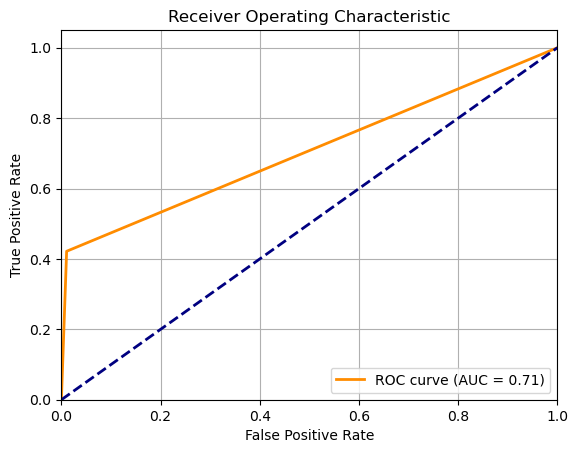

In [36]:
#=================Plotting ROC curve based on Decision Tree====================(By Abhishek)
from sklearn.metrics import roc_curve, auc
# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()
#====================================================================================================

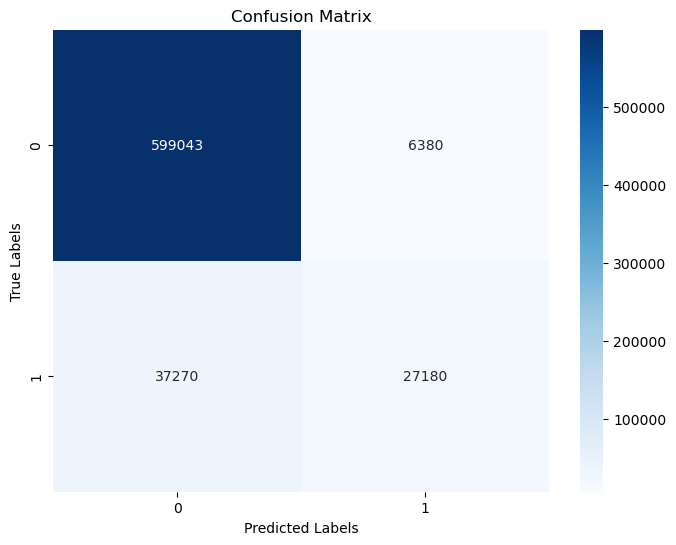

In [37]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [45]:
#===================Predictive Analysis by using Random Forest===========================(By Abhishek)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
columns = ['LoadFactor','Transformed_HTTP_Auth']
X = df_encoded.drop(columns, axis=1)
y = df_encoded['LoadFactor']

clf_RF = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Fitting the classifier to the training data
clf_RF.fit(X_train, y_train)

# Making predictions on the testing data
y_pred_RF = clf_RF.predict(X_test)

# Evaluating the accuracy of the model
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print("Accuracy:", accuracy_RF)
#========================================================================================================

Accuracy: 0.9287984438841392


In [46]:
#=================Classification Report based on Random Forest===========================(By Abhishek)
from sklearn.metrics import classification_report
report_RF = classification_report(y_test, y_pred_RF)
print(report_RF)
#========================================================================================

              precision    recall  f1-score   support

           0       0.93      1.00      0.96    605423
           1       0.88      0.30      0.45     64450

    accuracy                           0.93    669873
   macro avg       0.90      0.65      0.71    669873
weighted avg       0.93      0.93      0.91    669873



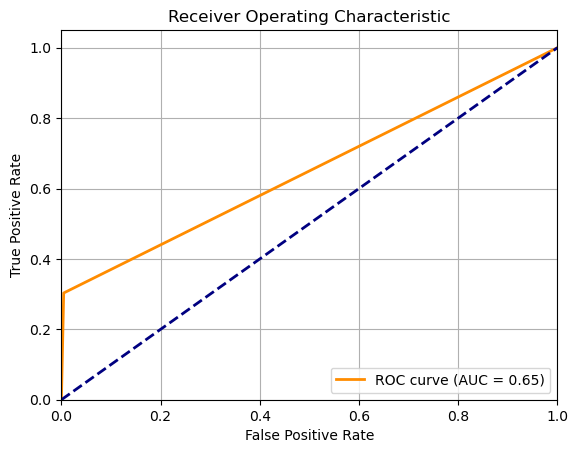

In [47]:
#=================Plotting ROC curve based on Random Forest====================(By Abhishek)
# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_RF)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()
#====================================================================================================

In [48]:
#======================================Random Forest============================================================================
importances = clf_RF.feature_importances_

# Create a dataframe with feature names and importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the dataframe by importance values in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

                                         Feature  Importance
19      Resource_DocumentReviewListResource.post    0.127214
20             Resource_DocumentSlaResource.post    0.125272
14  Resource_DocumentListAnnotationResource.post    0.097045
15             Resource_DocumentListResource.get    0.086314
0                                 HTTPMethod_GET    0.083271
1                                HTTPMethod_HEAD    0.071248
13      Resource_DocumentClassesListResource.get    0.065991
22                     Resource_TaskResource.get    0.062248
17                 Resource_DocumentResource.get    0.049902
3                                HTTPMethod_POST    0.043357
2                               HTTPMethod_PATCH    0.018955
27                              DayName_Thursday    0.017215
18    Resource_DocumentReviewClassResource.patch    0.016724
24                                DayName_Monday    0.013930
26                                DayName_Sunday    0.013259
16  Resource_DocumentRej

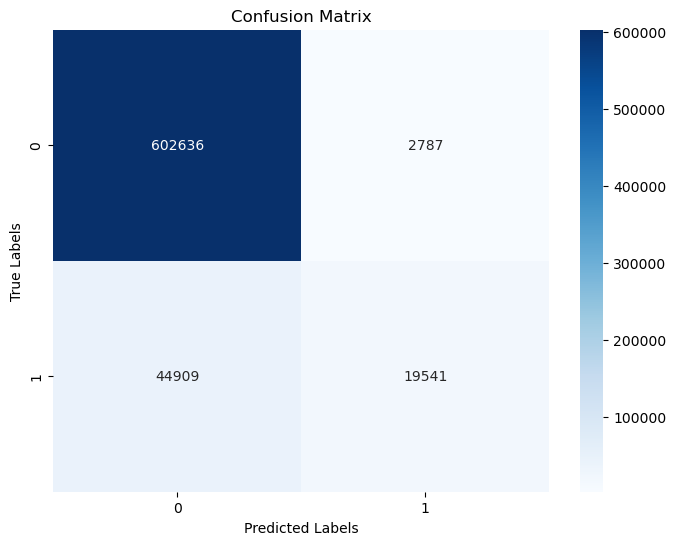

In [49]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_RF)
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [50]:
#=======================Classification Report based on Logistic Regression====================(By Abhishek)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
columns = ['LoadFactor']
X = df_encoded.drop(columns, axis=1)
y = df_encoded['LoadFactor']

clf_LR = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Fitting the classifier to the training data
clf_LR.fit(X_train, y_train)

# Making predictions on the testing data
y_pred_LR = clf_LR.predict(X_test)

# Evaluating the accuracy of the model
accuracy_LR = accuracy_score(y_test, y_pred_LR)
print("Accuracy:", accuracy_LR)
#==========================================================================================================

Accuracy: 0.9305793784792042


C:\Users\abhie\anaconda3\envs\jupyter_nb_env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
#=======================Classification Report based on Logistic Regression====================(By Abhishek)
from sklearn.metrics import classification_report
report_LR = classification_report(y_test, y_pred_LR)
print(report_LR)
#=================================================================================================

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    605423
           1       0.73      0.44      0.55     64450

    accuracy                           0.93    669873
   macro avg       0.84      0.71      0.76    669873
weighted avg       0.92      0.93      0.92    669873



In [55]:
#========================================Logistic Regression============================================================================
# Get the coefficients of logistic regression
coefficients = clf_LR.coef_[0]

# Create a dataframe with feature names and coefficients
feature_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Sort the dataframe by absolute coefficient values in descending order
feature_coefficients['Importance'] = np.abs(feature_coefficients['Coefficient'])
feature_coefficients = feature_coefficients.sort_values(by='Importance', ascending=False)

print(feature_coefficients[['Feature','Importance']])

                                         Feature  Importance
21             Resource_DocumentSlaResource.post    6.282614
14      Resource_DocumentClassesListResource.get    4.626418
20      Resource_DocumentReviewListResource.post    4.496848
22             Resource_OrganizationResource.get    4.461659
23                     Resource_TaskResource.get    4.209596
17  Resource_DocumentRejectionsListResource.post    3.550575
0                          Transformed_HTTP_Auth    2.813664
18                 Resource_DocumentResource.get    2.768863
3                               HTTPMethod_PATCH    2.063082
19    Resource_DocumentReviewClassResource.patch    2.063082
15  Resource_DocumentListAnnotationResource.post    1.147965
2                                HTTPMethod_HEAD    0.997083
4                                HTTPMethod_POST    0.989469
16             Resource_DocumentListResource.get    0.821497
24                                DayName_Friday    0.626416
9                       

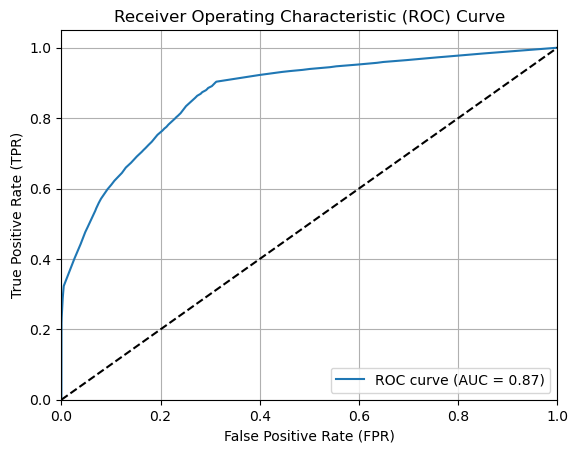

In [32]:
#=================Plotting ROC curve based on Logistic Regression====================(By Abhishek)
from sklearn.metrics import roc_curve, roc_auc_score
# Make predictions on the test set
y_scores = clf_LR.predict_proba(X_test)[:, 1]

# Calculate the fpr and tpr for different threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under the Curve) score
auc = roc_auc_score(y_test, y_scores)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()
#====================================================================================================

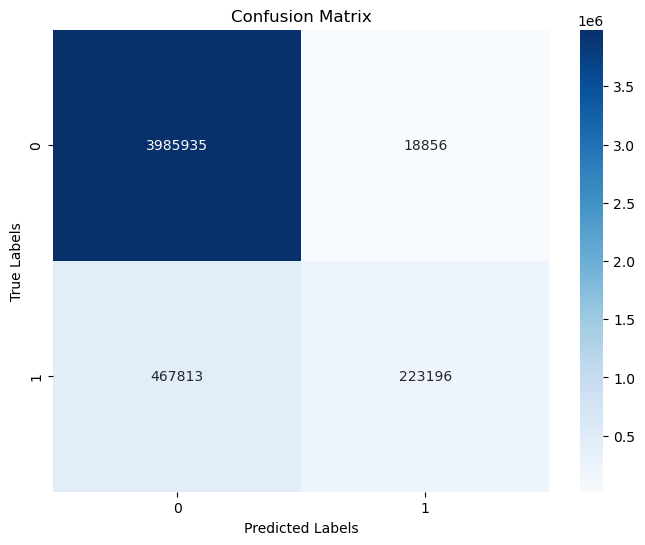

In [30]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_LR)
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()